<h1>census-income.data Analysis</h1>
<h3>http://archive.ics.uci.edu/ml/datasets/Census-Income+(KDD)</h3>

In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.types import DoubleType, StringType, IntegerType, FloatType

In [2]:
spark = SparkSession.builder.appName('census_income').getOrCreate()

<h2>2.	Download the Census Income data at http://archive.ics.uci.edu/ml/datasets/Census-Income+(KDD)</h2>

In [3]:
df = spark.read.csv('c:/Users/Martin/PySpark_UDEMY/CensusIncome/census-income.data', sep=',')
df = df.drop(*['_c24'])
print('#columns: {0}'.format(len(df.columns)))
print('#records: {0}'.format(df.count()))
print(df.columns)

#columns: 41
#records: 199523
['_c0', '_c1', '_c2', '_c3', '_c4', '_c5', '_c6', '_c7', '_c8', '_c9', '_c10', '_c11', '_c12', '_c13', '_c14', '_c15', '_c16', '_c17', '_c18', '_c19', '_c20', '_c21', '_c22', '_c23', '_c25', '_c26', '_c27', '_c28', '_c29', '_c30', '_c31', '_c32', '_c33', '_c34', '_c35', '_c36', '_c37', '_c38', '_c39', '_c40', '_c41']


In [4]:
# load new column names
new_col_list = []
with open("c:/Users/Martin/PySpark_UDEMY/CensusIncome/colnames_fixed.txt") as f:
    for line in f:
        cname = line.split(':')[0].strip('\n')
        # convert colnames to PascalCase
        new_col_list.append(''.join(x for x in cname.title() if not x.isspace()))

print(new_col_list)
print('# columns: {0}'.format(len(new_col_list)))

['Age', 'ClassOfWorker', 'DetailedIndustryRecode', 'DetailedOccupationRecode', 'Education', 'WagePerHour', 'EnrollInEduInstLastWk', 'MaritalStat', 'MajorIndustryCode', 'MajorOccupationCode', 'Race', 'HispanicOrigin', 'Sex', 'MemberOfALaborUnion', 'ReasonForUnemployment', 'FullOrPartTimeEmploymentStat', 'CapitalGains', 'CapitalLosses', 'DividendsFromStocks', 'TaxFilerStat', 'RegionOfPreviousResidence', 'StateOfPreviousResidence', 'DetailedHouseholdAndFamilyStat', 'DetailedHouseholdSummaryInHousehold', 'MigrationCode-ChangeInMsa', 'MigrationCode-ChangeInReg', 'MigrationCode-MoveWithinReg', 'LiveInThisHouse1YearAgo', 'MigrationPrevResInSunbelt', 'NumPersonsWorkedForEmployer', 'FamilyMembersUnder18', 'CountryOfBirthFather', 'CountryOfBirthMother', 'CountryOfBirthSelf', 'Citizenship', 'OwnBusinessOrSelfEmployed', "FillIncQuestionnaireForVeteran'SAdmin", 'VeteransBenefits', 'WeeksWorkedInYear', 'Year', 'IncomeLevel']
# columns: 41


In [5]:
# rename original columns
newcol_ind = 0
for colname in df.columns:
    df = df.withColumnRenamed(colname, new_col_list[newcol_ind])
    newcol_ind += 1

In [6]:
# all columns are data type of string
double_type = ['Age','DetailedIndustryRecode','DetailedOccupationRecode',
               'WagePerHour','CapitalGains','CapitalLosses','DividendsFromStocks','WeeksWorkedInYear',
               'OwnBusinessOrSelfEmployed','NumPersonsWorkedForEmployer','VeteransBenefits','Year']

for c in double_type:
    df = df.withColumn(c, df[c].cast(DoubleType()))


In [124]:
# df.printSchema()

<h2>3.	Print the data Schema, Summary, # of columns and # of rows.</h2>

In [7]:
# df.printSchema()
print('#columns: {0}'.format(len(df.columns)))
print('#records: {0}'.format(df.count()))
df.select('OwnBusinessOrSelfEmployed').distinct().show()

#columns: 41
#records: 199523
+-------------------------+
|OwnBusinessOrSelfEmployed|
+-------------------------+
|                      0.0|
|                      1.0|
|                      2.0|
+-------------------------+



In [8]:
# show basic stats e.g. for variable age
df.select(df['Age']).describe().show()

+-------+------------------+
|summary|               Age|
+-------+------------------+
|  count|            199523|
|   mean|34.494198663813194|
| stddev|22.310895206650255|
|    min|               0.0|
|    max|              90.0|
+-------+------------------+



In [7]:
# # of columns and # of rows
print('# rows is {0}'.format(df.count()))
print('# columns is {0}'.format(len(df.columns)))

# rows is 199523
# columns is 41


<h2>4.	Print a table that distinct values of all columns.</h2>

In [146]:
for colname in df.columns:
    print('{0} ({1} unique values): {2}'.format(colname,
                                                df.select(df[colname]).distinct().count(),
                                                [i[colname] for i in df.select(df[colname]).distinct().collect()]))

Age (91 unique values): [8.0, 70.0, 67.0, 0.0, 69.0, 7.0, 88.0, 49.0, 29.0, 75.0, 64.0, 47.0, 42.0, 44.0, 35.0, 62.0, 18.0, 86.0, 80.0, 39.0, 1.0, 34.0, 37.0, 25.0, 36.0, 41.0, 4.0, 85.0, 23.0, 77.0, 56.0, 50.0, 78.0, 79.0, 45.0, 83.0, 71.0, 31.0, 11.0, 58.0, 51.0, 72.0, 21.0, 14.0, 63.0, 48.0, 22.0, 82.0, 74.0, 60.0, 66.0, 68.0, 53.0, 19.0, 3.0, 61.0, 81.0, 59.0, 46.0, 28.0, 2.0, 57.0, 87.0, 17.0, 38.0, 27.0, 10.0, 73.0, 30.0, 40.0, 13.0, 84.0, 33.0, 6.0, 20.0, 52.0, 32.0, 5.0, 24.0, 15.0, 89.0, 55.0, 9.0, 26.0, 65.0, 16.0, 12.0, 54.0, 76.0, 43.0, 90.0]
ClassOfWorker (9 unique values): [' Never worked', ' State government', ' Local government', ' Private', ' Self-employed-incorporated', ' Not in universe', ' Self-employed-not incorporated', ' Federal government', ' Without pay']
DetailedIndustryRecode (52 unique values): [8.0, 0.0, 7.0, 49.0, 29.0, 47.0, 42.0, 44.0, 35.0, 18.0, 39.0, 1.0, 34.0, 37.0, 25.0, 36.0, 41.0, 4.0, 23.0, 50.0, 45.0, 31.0, 11.0, 21.0, 51.0, 14.0, 48.0, 22.0, 3.

EnrollInEduInstLastWk (3 unique values): [' College or university', ' High school', ' Not in universe']
MaritalStat (7 unique values): [' Widowed', ' Married-A F spouse present', ' Never married', ' Divorced', ' Married-spouse absent', ' Separated', ' Married-civilian spouse present']
MajorIndustryCode (24 unique values): [' Medical except hospital', ' Not in universe or children', ' Public administration', ' Forestry and fisheries', ' Agriculture', ' Retail trade', ' Social services', ' Private household services', ' Construction', ' Mining', ' Manufacturing-durable goods', ' Finance insurance and real estate', ' Armed Forces', ' Education', ' Communications', ' Personal services except private HH', ' Hospital services', ' Transportation', ' Wholesale trade', ' Business and repair services', ' Entertainment', ' Utilities and sanitary services', ' Manufacturing-nondurable goods', ' Other professional services']
MajorOccupationCode (15 unique values): [' Adm support including clerical',

TaxFilerStat (6 unique values): [' Joint both under 65', ' Head of household', ' Nonfiler', ' Joint both 65+', ' Joint one under 65 & one 65+', ' Single']
RegionOfPreviousResidence (6 unique values): [' Abroad', ' South', ' West', ' Not in universe', ' Midwest', ' Northeast']
StateOfPreviousResidence (51 unique values): [' Kansas', ' North Dakota', ' Missouri', ' Maine', ' Pennsylvania', ' Abroad', ' Iowa', ' Ohio', ' Louisiana', ' Arizona', ' West Virginia', ' Illinois', ' South Carolina', ' Arkansas', ' New Hampshire', ' Nevada', ' California', ' Virginia', ' Colorado', ' Georgia', ' Minnesota', ' Alaska', ' New Mexico', ' Kentucky', ' Michigan', ' Tennessee', ' District of Columbia', ' New Jersey', ' Oklahoma', ' Wyoming', ' Wisconsin', ' New York', ' Alabama', ' Nebraska', ' Oregon', ' Connecticut', ' Indiana', ' Delaware', ' Not in universe', ' ?', ' Idaho', ' Montana', ' Massachusetts', ' Maryland', ' Vermont', ' South Dakota', ' North Carolina', ' Florida', ' Texas', ' Mississip

<h2>5.	Make exploratory data analysis and visualize your findings from data.</h2>

In [147]:
# Drops the useless columns from the original data
def drop_columns(data, list_columns_to_drop):
    return(data.drop(*list_columns_to_drop))

# Drops rows having missing or NA values from the data set
def drop_rows(data):
    row1 = np.where(data['GRINST'] == ' ?')[0]
    row2 = np.where(data['HHDFMX'] == ' Grandchild <18 ever marr not in subfamily')[0]
    rownum = np.concatenate((row1, row2))
    data = data.drop(data.index[rownum])
    return data

In [91]:
# df_new = drop_columns(df, ['MIGMTR1', 'MIGMTR3', 'MIGMTR4', 'MIGSUN', 'PEFNTVTY', 'PEMNTVTY', 'PENATVTY', 'YEAR'])

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
print(df.columns)

['Age', 'ClassOfWorker', 'DetailedIndustryRecode', 'DetailedOccupationRecode', 'Education', 'WagePerHour', 'EnrollInEduInstLastWk', 'MaritalStat', 'MajorIndustryCode', 'MajorOccupationCode', 'Race', 'HispanicOrigin', 'Sex', 'MemberOfALaborUnion', 'ReasonForUnemployment', 'FullOrPartTimeEmploymentStat', 'CapitalGains', 'CapitalLosses', 'DividendsFromStocks', 'TaxFilerStat', 'RegionOfPreviousResidence', 'StateOfPreviousResidence', 'DetailedHouseholdAndFamilyStat', 'DetailedHouseholdSummaryInHousehold', 'MigrationCode-ChangeInMsa', 'MigrationCode-ChangeInReg', 'MigrationCode-MoveWithinReg', 'LiveInThisHouse1YearAgo', 'MigrationPrevResInSunbelt', 'NumPersonsWorkedForEmployer', 'FamilyMembersUnder18', 'CountryOfBirthFather', 'CountryOfBirthMother', 'CountryOfBirthSelf', 'Citizenship', 'OwnBusinessOrSelfEmployed', "FillIncQuestionnaireForVeteran'SAdmin", 'VeteransBenefits', 'WeeksWorkedInYear', 'Year', 'IncomeLevel']


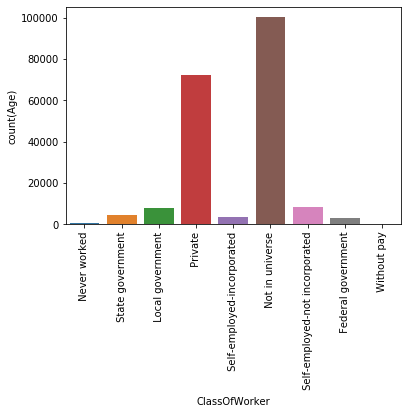

In [12]:
# class of worker by age
ACLSWKR_dist_by_AAGE = df.groupBy('ClassOfWorker').agg({'Age': 'count'}).toPandas()
g = sns.barplot(x="ClassOfWorker", y="count(Age)", data=ACLSWKR_dist_by_AAGE)
g = g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.show()

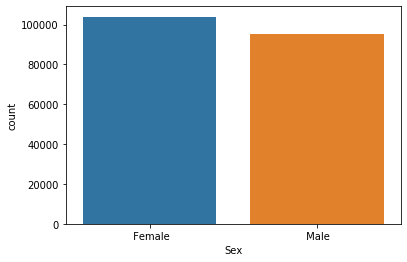

In [13]:
# male/female distribution
mf_dist = df.select(df['Sex']).toPandas()
sns.countplot(x='Sex', data=mf_dist)

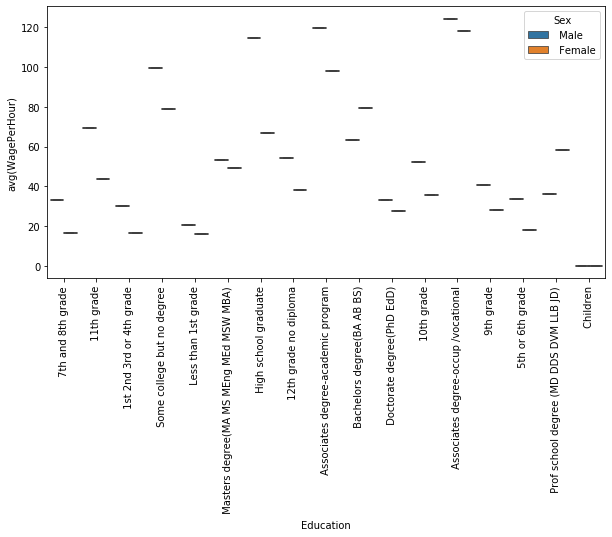

In [14]:
# WagePerHour vs Education
ed_wage = df.groupBy(['Education','Sex']).agg({'WagePerHour': 'avg'}).toPandas()
plt.figure(figsize=(10,5))
g = sns.boxplot(x='Education', y='avg(WagePerHour)', data=ed_wage, hue='Sex')
g = g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.show()

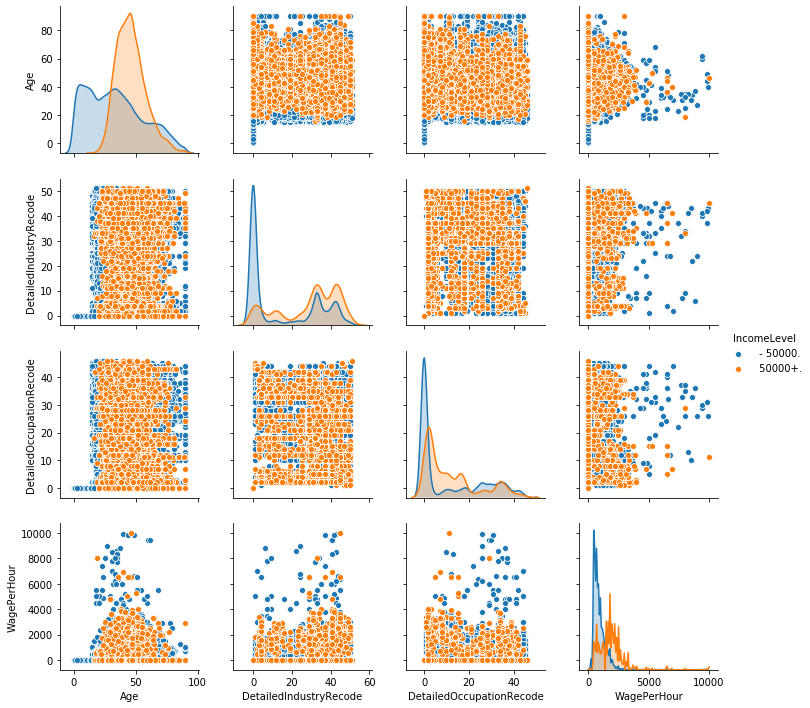

In [15]:
# selected_columns = ['Age','DetailedIndustryRecode','DetailedOccupationRecode','WagePerHour', 'CapitalGains','CapitalLosses','DividendsFromStocks','WeeksWorkedInYear']
selected_columns = ['Age','DetailedIndustryRecode','DetailedOccupationRecode','WagePerHour','IncomeLevel']
pair_plot = df.select(*selected_columns).toPandas()
pair_plot[['Age','DetailedIndustryRecode','DetailedOccupationRecode','WagePerHour']] = pair_plot[['Age','DetailedIndustryRecode','DetailedOccupationRecode','WagePerHour']].apply(pd.to_numeric)
# pp = pair_plot.head()
sns.pairplot(pair_plot, hue='IncomeLevel')

In [16]:
df.groupBy(['IncomeLevel']).agg({'IncomeLevel': 'count'}).show()

+-----------+------------------+
|IncomeLevel|count(IncomeLevel)|
+-----------+------------------+
|   - 50000.|            187141|
|    50000+.|             12382|
+-----------+------------------+



<Figure size 640x480 with 0 Axes>

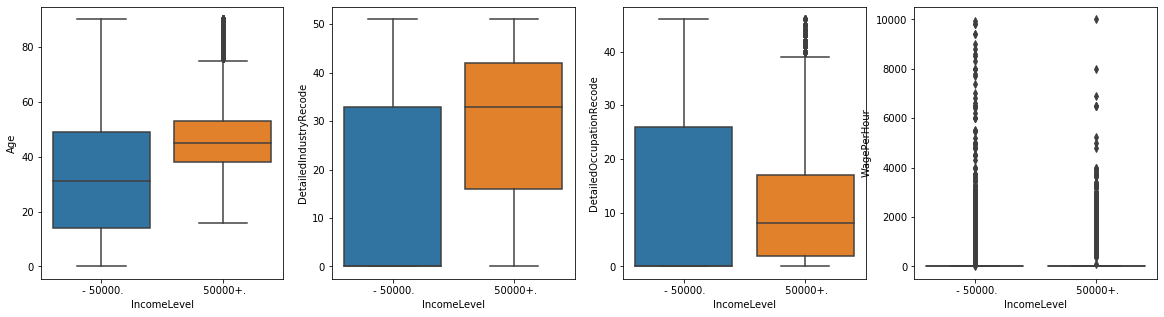

In [17]:
selected_columns = ['Age','DetailedIndustryRecode','DetailedOccupationRecode','WagePerHour','IncomeLevel']
continuous_vars = df.select(*selected_columns).toPandas()
continuous_vars[['Age','DetailedIndustryRecode','DetailedOccupationRecode','WagePerHour']] = continuous_vars[['Age','DetailedIndustryRecode','DetailedOccupationRecode','WagePerHour']].apply(pd.to_numeric)

# plot multiple boxplots by IncomeLevel
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

fig, axs = plt.subplots(ncols=4)
col_no = 0
for pl in selected_columns[:-1]:
    fig.set_size_inches(20,5)
    sns.boxplot(x='IncomeLevel', y=pl, data=continuous_vars, ax=axs[col_no])
    col_no += 1

In [18]:
df.describe().select("Summary", *selected_columns[:-1]).show()

+-------+------------------+----------------------+------------------------+------------------+
|Summary|               Age|DetailedIndustryRecode|DetailedOccupationRecode|       WagePerHour|
+-------+------------------+----------------------+------------------------+------------------+
|  count|            199523|                199523|                  199523|            199523|
|   mean|34.494198663813194|    15.352320283877047|      11.306556136385279|55.426908175999756|
| stddev|22.310895206650255|    18.067128797857993|      14.454203916353702| 274.8964539028428|
|    min|               0.0|                   0.0|                     0.0|               0.0|
|    max|              90.0|                  51.0|                    46.0|            9999.0|
+-------+------------------+----------------------+------------------------+------------------+



<h2>6.	Create a binary target variable to predict income above 50k and below 50k</h2>

In [19]:
for elem in df.select(df['IncomeLevel']).distinct().collect():
    print(elem)

Row(IncomeLevel=' - 50000.')
Row(IncomeLevel=' 50000+.')


In [20]:
from pyspark.sql.functions import col, expr, when

In [21]:
incomeLevel_col = when(col("IncomeLevel") == ' - 50000.', 0).otherwise(1)
df = df.withColumn('IncomeLevel_binary', incomeLevel_col)
df = df.withColumn('IncomeLevel_binary', df['IncomeLevel_binary'].cast(IntegerType()))

In [22]:
# df.columns
# df.printSchema()
df.select(df['IncomeLevel_binary']).distinct().show()

+------------------+
|IncomeLevel_binary|
+------------------+
|                 1|
|                 0|
+------------------+



<h2>7.	Feature Engineering</h2>
<p>Select the most promising features without using any ML model (assume that dataset contains many features, and you cannot train a model on all of them). Hint: you may use some heuristics, significance tests etc. to select the predictive variables. You may not rely on model-based feature reduction techniques like Stepwise selection, Regularization. The goal here is to not rely on modeling algorithms to select features, as this may be very costly.</p>

In [9]:
df_orig = df.select(*df.columns[:-1])

In [28]:
# checking categorical variables
for i in df.dtypes:
    if i[1]=='string':
        df.groupBy(i[0]).count().orderBy('count', ascending=False).show()

+--------------------+------+
|       ClassOfWorker| count|
+--------------------+------+
|     Not in universe|100245|
|             Private| 72028|
| Self-employed-no...|  8445|
|    Local government|  7784|
|    State government|  4227|
| Self-employed-in...|  3265|
|  Federal government|  2925|
|        Never worked|   439|
|         Without pay|   165|
+--------------------+------+

+--------------------+-----+
|           Education|count|
+--------------------+-----+
| High school grad...|48407|
|            Children|47422|
| Some college but...|27820|
| Bachelors degree...|19865|
|   7th and 8th grade| 8007|
|          10th grade| 7557|
|          11th grade| 6876|
| Masters degree(M...| 6541|
|           9th grade| 6230|
| Associates degre...| 5358|
| Associates degre...| 4363|
|    5th or 6th grade| 3277|
| 12th grade no di...| 2126|
| 1st 2nd 3rd or 4...| 1799|
| Prof school degr...| 1793|
| Doctorate degree...| 1263|
| Less than 1st grade|  819|
+--------------------+-----+


+---------------------------+-----+
|MigrationCode-MoveWithinReg|count|
+---------------------------+-----+
|                          ?|99696|
|                   Nonmover|82538|
|                Same county| 9812|
|        Different county...| 2797|
|            Not in universe| 1516|
|        Different state ...|  973|
|        Different state ...|  679|
|        Different state ...|  551|
|                     Abroad|  530|
|        Different state ...|  431|
+---------------------------+-----+

+-----------------------+------+
|LiveInThisHouse1YearAgo| count|
+-----------------------+------+
|    Not in universe ...|101212|
|                    Yes| 82538|
|                     No| 15773|
+-----------------------+------+

+-------------------------+-----+
|MigrationPrevResInSunbelt|count|
+-------------------------+-----+
|                        ?|99696|
|          Not in universe|84054|
|                       No| 9987|
|                      Yes| 5786|
+------------------------

In [46]:
df_orig.dtypes

[('Age', 'double'),
 ('ClassOfWorker', 'string'),
 ('DetailedIndustryRecode', 'double'),
 ('DetailedOccupationRecode', 'double'),
 ('Education', 'string'),
 ('WagePerHour', 'double'),
 ('EnrollInEduInstLastWk', 'string'),
 ('MaritalStat', 'string'),
 ('MajorIndustryCode', 'string'),
 ('MajorOccupationCode', 'string'),
 ('Race', 'string'),
 ('HispanicOrigin', 'string'),
 ('Sex', 'string'),
 ('MemberOfALaborUnion', 'string'),
 ('ReasonForUnemployment', 'string'),
 ('FullOrPartTimeEmploymentStat', 'string'),
 ('CapitalGains', 'double'),
 ('CapitalLosses', 'double'),
 ('DividendsFromStocks', 'double'),
 ('TaxFilerStat', 'string'),
 ('RegionOfPreviousResidence', 'string'),
 ('StateOfPreviousResidence', 'string'),
 ('DetailedHouseholdAndFamilyStat', 'string'),
 ('DetailedHouseholdSummaryInHousehold', 'string'),
 ('MigrationCode-ChangeInMsa', 'string'),
 ('MigrationCode-ChangeInReg', 'string'),
 ('MigrationCode-MoveWithinReg', 'string'),
 ('LiveInThisHouse1YearAgo', 'string'),
 ('MigrationPre

In [10]:
# one hot encoding and assembling
encoding_var = [i[0] for i in df_orig.dtypes if (i[1]=='string') & (i[0]!='IncomeLevel')]
num_var = [i[0] for i in df_orig.dtypes if ((i[1]=='int') | (i[1]=='double')) & (i[0]!='IncomeLevel_binary')]

In [11]:
encoding_var
# num_var

['ClassOfWorker',
 'Education',
 'EnrollInEduInstLastWk',
 'MaritalStat',
 'MajorIndustryCode',
 'MajorOccupationCode',
 'Race',
 'HispanicOrigin',
 'Sex',
 'MemberOfALaborUnion',
 'ReasonForUnemployment',
 'FullOrPartTimeEmploymentStat',
 'TaxFilerStat',
 'RegionOfPreviousResidence',
 'StateOfPreviousResidence',
 'DetailedHouseholdAndFamilyStat',
 'DetailedHouseholdSummaryInHousehold',
 'MigrationCode-ChangeInMsa',
 'MigrationCode-ChangeInReg',
 'MigrationCode-MoveWithinReg',
 'LiveInThisHouse1YearAgo',
 'MigrationPrevResInSunbelt',
 'FamilyMembersUnder18',
 'CountryOfBirthFather',
 'CountryOfBirthMother',
 'CountryOfBirthSelf',
 'Citizenship',
 "FillIncQuestionnaireForVeteran'SAdmin"]

In [12]:
from pyspark.sql.functions import *
from pyspark.ml.classification import  DecisionTreeClassifier, RandomForestClassifier, GBTClassifier
from pyspark.ml.feature import StringIndexer, OneHotEncoderEstimator, VectorAssembler, VectorSlicer
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
from pyspark.ml.linalg import Vectors
from pyspark.ml.tuning import ParamGridBuilder, TrainValidationSplit

In [13]:
string_indexes = [StringIndexer(inputCol = c, outputCol = 'IDX_' + c, handleInvalid = 'keep') for c in encoding_var]
onehot_indexes = [OneHotEncoderEstimator(inputCols = ['IDX_' + c], outputCols = ['OHE_' + c]) for c in encoding_var]
label_indexes = StringIndexer(inputCol = 'IncomeLevel', outputCol = 'label', handleInvalid = 'keep')
assembler = VectorAssembler(inputCols = num_var + ['OHE_' + c for c in encoding_var], outputCol = "features")
rf = RandomForestClassifier(labelCol="label", featuresCol="features", seed = 8464,
                            numTrees=10, cacheNodeIds = True, subsamplingRate = 0.7)

pipe = Pipeline(stages = string_indexes + onehot_indexes + [assembler, label_indexes, rf])

In [18]:
label_indexes

StringIndexer_4147b7d8a7946aef2736

In [63]:
mod = pipe.fit(df_orig)

In [64]:
df2 = mod.transform(df_orig)

In [65]:
mod.stages[-1].featureImportances

SparseVector(408, {0: 0.0111, 1: 0.0609, 2: 0.0597, 3: 0.0043, 4: 0.0018, 5: 0.0011, 6: 0.059, 7: 0.0695, 8: 0.0006, 9: 0.0004, 10: 0.1103, 11: 0.0, 12: 0.0, 13: 0.0001, 14: 0.0001, 15: 0.0001, 17: 0.0023, 21: 0.0026, 22: 0.0029, 23: 0.0001, 24: 0.0059, 26: 0.0001, 28: 0.099, 30: 0.0002, 35: 0.0084, 36: 0.0098, 38: 0.0011, 41: 0.0181, 42: 0.0317, 43: 0.0009, 49: 0.0008, 50: 0.0046, 51: 0.0002, 52: 0.0009, 53: 0.0016, 54: 0.0001, 55: 0.0001, 57: 0.0024, 58: 0.0, 59: 0.0, 60: 0.002, 63: 0.0001, 64: 0.0016, 66: 0.0002, 72: 0.0088, 73: 0.0124, 74: 0.0371, 75: 0.0427, 78: 0.0007, 79: 0.0005, 83: 0.0016, 87: 0.0006, 89: 0.0002, 92: 0.0006, 102: 0.0181, 103: 0.0317, 105: 0.0001, 106: 0.0, 108: 0.0, 113: 0.0002, 114: 0.0067, 115: 0.0066, 116: 0.0001, 118: 0.0001, 121: 0.0571, 122: 0.0594, 123: 0.004, 125: 0.0046, 126: 0.0002, 129: 0.0002, 144: 0.0, 153: 0.0002, 184: 0.0307, 185: 0.0012, 186: 0.0191, 187: 0.0004, 188: 0.0008, 189: 0.0001, 222: 0.0687, 225: 0.0003, 241: 0.0001, 243: 0.0002, 251:

In [66]:
def ExtractFeatureImp(featureImp, dataset, featuresCol):
    list_extract = []
    for i in dataset.schema[featuresCol].metadata["ml_attr"]["attrs"]:
        list_extract = list_extract + dataset.schema[featuresCol].metadata["ml_attr"]["attrs"][i]
    varlist = pd.DataFrame(list_extract)
    varlist['score'] = varlist['idx'].apply(lambda x: featureImp[x])
    return(varlist.sort_values('score', ascending = False))

In [67]:
ExtractFeatureImp(mod.stages[-1].featureImportances, df2, "features").head(10)

,idx,name,score
10,10,WeeksWorkedInYear,0.110257
28,28,OHE_Education_ Masters degree(MA MS MEng MEd M...,0.099047
7,7,NumPersonsWorkedForEmployer,0.069521
222,222,OHE_DetailedHouseholdSummaryInHousehold_ House...,0.068684
1,1,DetailedIndustryRecode,0.060948
2,2,DetailedOccupationRecode,0.059655
122,122,OHE_TaxFilerStat_ Joint both under 65,0.059405
6,6,DividendsFromStocks,0.059006
121,121,OHE_TaxFilerStat_ Nonfiler,0.057122
75,75,OHE_MajorOccupationCode_ Executive admin and m...,0.042698


In [72]:
#  top 10 features and create a new input vector column with only these variables
varlist = ExtractFeatureImp(mod.stages[-1].featureImportances, df2, "features")
varidx = [x for x in varlist['idx'][0:10]]
varidx

[10, 28, 7, 222, 1, 2, 122, 6, 121, 75]

In [89]:
slicer = VectorSlicer(inputCol="features", outputCol="features2", indices=varidx)
df3 = slicer.transform(df2)

In [90]:
df3 = df3.drop('rawPrediction', 'probability', 'prediction')
train_data, test_data = df3.randomSplit([0.7, 0.3])

In [91]:
# df3 = df3.drop('rawPrediction', 'probability', 'prediction')
rf2 = RandomForestClassifier(labelCol="label", featuresCol="features2", seed = 8464,
                            numTrees=10, cacheNodeIds = True, subsamplingRate = 0.7)
dtc = DecisionTreeClassifier(labelCol="label", featuresCol="features2")
gbt = GBTClassifier(labelCol="label", featuresCol="features2")

In [92]:
rf_mod = rf2.fit(train_data)
dtc_mod = dtc.fit(train_data)
gbt_mod = gbt.fit(train_data)

In [94]:
rf_preds = rf_mod.transform(test_data)
dtc_preds = dtc_mod.transform(test_data)
gbt_preds = gbt_mod.transform(test_data)

In [95]:
binary_eval = BinaryClassificationEvaluator(labelCol='label')

In [96]:
print('DTC: {0}'.format(binary_eval.evaluate(dtc_preds)))
print('RF: {0}'.format(binary_eval.evaluate(rf_preds)))
print('GBT: {0}'.format(binary_eval.evaluate(gbt_preds)))

DTC: 0.8733464659525071
RF: 0.9084893453955045
GBT: 0.9211865937996525


In [99]:
# Or using of MulticlassClassificationEvaluator
acc_eval = MulticlassClassificationEvaluator(labelCol='label', metricName='accuracy')

In [102]:
print('RF accuracy: {0}'.format(acc_eval.evaluate(rf_preds)))
print('DTC accuracy: {0}'.format(acc_eval.evaluate(dtc_preds)))
print('GBT accuracy: {0}'.format(acc_eval.evaluate(gbt_preds)))

RF accuracy: 0.9435821590002659
DTC accuracy: 0.9425352299920234
GBT accuracy: 0.9467894177080564


In [ ]:
# 12. Explain the steps taken to avoid model overfitting
# use cross validation
# use regularization

<h2>Running PySpark on an AWS Cluster through Jupyter Notebook</h2>

In [103]:
# 1) Creating a cluster on Amazon EMR (Elastic Map Reduce):
# Submit our jobs to the master node of our cluster, which figures out the optimal way to run it. 
# The master node then doles out tasks to the worker nodes accordingly

# 2) Connecting to our cluster through a Jupyter notebook:
# e.g. ssh -i your-authentication-key-pem-file -L 8000:localhost:8888 your-machine's-Public-DNS

# 3) Loading data from e.g. Amazon S3
# e.g.
# input_bucket = 's3://amazon-reviews-pds'
# input_path = '/parquet/product_category=Books/*.parquet'
# df = spark.read.parquet(input_bucket + input_path)

# 4) Performing EDA, Feature Engineering, ML modelling
